In [1]:
import os

%load_ext autoreload
%autoreload 2

"""

DEcoding shapes, in pool where there are novel and learned shapes
Questions:
- Decoding for learned shapes is better
- Learned genearlize to themselves and novel to themselves more.
"""

'\n\nDEcoding shapes, in pool where there are novel and learned shapes\nQuestions:\n- Decoding for learned shapes is better\n- Learned genearlize to themselves and novel to themselves more.\n'

# Load a dataset

To load and plot a dataset of neural activity across population, in a PopAnal class object.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

from neuralmonkey.classes.population_mult import load_handsaved_wrapper, dfpa_match_chans_across_pa_each_bregion
from neuralmonkey.classes.population_mult import extract_single_pa


In [ ]:
# Method 1 - load a single DFallPA
DFallpa = load_handsaved_wrapper()


In [3]:
# Method 1 - load a single DFallPA
animal = "Diego"
date = 240522
combine = True
# animal = "Pancho"
# date = 240523
# combine = False
DFallpa = load_handsaved_wrapper(animal=animal, date=date, version="trial", combine_areas=combine, question="SP_psycho_trial")


TODO: Pancho -- combine circles with the tohers


In [4]:
dflab = DFallpa["pa"].values[0].Xlabels["trials"]
dflab["aborted"].value_counts()

aborted
False    858
True      14
Name: count, dtype: int64

In [ ]:
# # Method 2 - Combine two dfallpa
# DFallpa1 = load_handsaved_wrapper(animal="Diego", date=230630, version="trial")
# DFallpa2 = load_handsaved_wrapper(animal="Diego", date=230630, version="stroke")
# DFallpa = pd.concat([DFallpa1, DFallpa2]).reset_index(drop=True)


In [ ]:
# # Method 2 - Combine two dfallpa
# animal = "Diego"
# date = 231211
# COMBINE_AREAS = True

# DFallpa1 = load_handsaved_wrapper(animal=animal, date=date, version="trial", combine_areas=COMBINE_AREAS, use_time=False)
# DFallpa2 = load_handsaved_wrapper(animal=animal, date=date, version="stroke", combine_areas=COMBINE_AREAS, use_time=False)
# DFallpa = pd.concat([DFallpa1, DFallpa2]).reset_index(drop=True)


# Preprocessing

In [5]:
from neuralmonkey.classes.population_mult import load_handsaved_wrapper, dfpa_match_chans_across_pa_each_bregion
from neuralmonkey.classes.population_mult import extract_single_pa


In [8]:
from neuralmonkey.classes.population_mult import dfpa_concatbregion_preprocess_clean_bad_channels, dfpa_concatbregion_preprocess_wrapper
dfpa_concatbregion_preprocess_wrapper(DFallpa, animal, date, do_sitesdirty_extraction=False)


M1  ...  57
M1  ...  57
M1  ...  57
M1  -- n chans final:  57
PMv  ...  62
PMv  ...  62
PMv  ...  62
PMv  -- n chans final:  62
PMd  ...  49
PMd  ...  49
PMd  ...  49
PMd  -- n chans final:  49
dlPFC  ...  28
dlPFC  ...  28
dlPFC  ...  28
dlPFC  -- n chans final:  28
vlPFC  ...  48
vlPFC  ...  48
vlPFC  ...  48
vlPFC  -- n chans final:  48
FP  ...  57
FP  ...  57
FP  ...  57
FP  -- n chans final:  57
SMA  ...  57
SMA  ...  57
SMA  ...  57
SMA  -- n chans final:  57
preSMA  ...  55
preSMA  ...  55
preSMA  ...  55
preSMA  -- n chans final:  55
Keep, for  M1  ... 57 / 57
Keep, for  PMv  ... 61 / 62
Keep, for  PMd  ... 47 / 49
Keep, for  dlPFC  ... 26 / 28
Keep, for  vlPFC  ... 47 / 48
Keep, for  FP  ... 31 / 57
Keep, for  SMA  ... 55 / 57
Keep, for  preSMA  ... 54 / 55
Running ..  M1
Running ..  PMv
Running ..  PMd
Running ..  dlPFC
Running ..  vlPFC
Running ..  FP
Running ..  SMA
Running ..  preSMA


In [9]:
# SAVEDIR = f"/lemur2/lucas/analyses/recordings/main/decode_moment/PSYCHO_SP/{animal}-{date}"
SAVEDIR = f"/tmp/NOVEL_PRIMS/{animal}-{date}"
os.makedirs(SAVEDIR, exist_ok=True)
print(SAVEDIR)

/tmp/NOVEL_PRIMS/Diego-240522


# Extract relevant variables


In [10]:
from neuralmonkey.scripts.analy_pig_decode_moment_syntaxTI import dfallpa_preprocess_condition
# shape_var_suff = "shapesemgrp"|
# loc_var_suff = "loc_on_clust"
shape_var_suff = "shape"
loc_var_suff = "loc"
dfallpa_preprocess_condition(DFallpa, shape_var_suff, loc_var_suff)

M1
PMv
PMd
dlPFC
vlPFC
FP
SMA
preSMA
M1
PMv
PMd
dlPFC
vlPFC
FP
SMA
preSMA
M1
PMv
PMd
dlPFC
vlPFC
FP
SMA
preSMA


In [15]:

SAVEDIR_BASE = "/tmp/NOVELPRIMS"
os.makedirs(SAVEDIR_BASE, exist_ok=True)

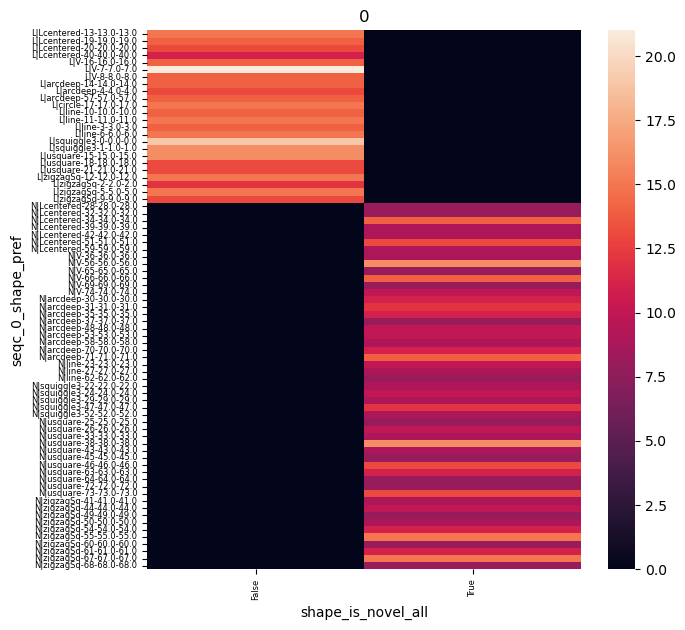

In [16]:
from neuralmonkey.scripts.analy_decode_moment_novelprims import analy_novelprim_prepare_dataset
analy_novelprim_prepare_dataset(DFallpa, animal, date, SAVEDIR_BASE)

# Extract beh data

In [ ]:
# from neuralmonkey.analyses.decode_moment import analy_psychoprim_prepare_beh_dataset
# DSmorphsets, map_tc_to_morph_info, map_morphset_to_basemorphinfo, map_tcmorphset_to_idxmorph, map_tcmorphset_to_info, map_morphsetidx_to_assignedbase_or_ambig, map_tc_to_morph_status = analy_psychoprim_prepare_beh_dataset(animal, date)

# Train / test

In [11]:
from neuralmonkey.analyses.decode_moment import train_decoder_helper, pipeline_train_test_scalar_score, pipeline_train_test_scalar_score_with_splits, pipeline_train_test_scalar_score_mult_train_dataset, test_decoder_helper, train_decoder_helper_extract_train_dataset
from neuralmonkey.scripts.analy_pig_decode_moment_syntaxTI import get_dataset_params
import os

In [12]:
# get list of base prim names

# One decoder for each shape - visualize generalization patterns

In [ ]:
bregion = "PMv"


In [ ]:
# Average over all train-test split
if False: # Doesnt work well, takes too long.
    cols_ignore = ["pa_idx", "decoder_idx", "train_split_idx"]
    cols_float = [col for col in dfscores.columns if dfscores[col].dtype == float]
    # cols_cat = [col for col in dfscores.columns if dfscores[col].dtype != float]
    # cols_cat = [col for col in cols_cat if col not in cols_ignore]
    cols_cat = ['decoder_class', 'pa_class', 'twind', 'epoch', 'trialcode']
    from pythonlib.tools.pandastools import aggregGeneral
    dfscores = aggregGeneral(dfscores, cols_cat, cols_float, nonnumercols="all")
    # Average over all train-test split
    [col for col in dfscores if isinstance(dfscores[col], float)]

### Method 1 -- not doing split by gridloc

In [ ]:
downsample_trials = False
if downsample_trials:
    # So that the lowest N doesnt pull all other categories down.
    n_min_per_var = 10
else:
    n_min_per_var = 7
        
TWIND_TEST = (0.05, 1.2)

do_upsample_balance=True
PLOT_DECODER = False
DO_TRAIN_TEST_SPLIT=True
PLOT_TEST_CONCATTED = True

TWIND_TRAIN = (0.05, 1.2)

# Subtrract baseline?
subtract_baseline=False
subtract_baseline_twind=None
include_null_data = False
prune_labels_exist_in_train_and_test = True

# - Train params
event_train = "03_samp"
twind_train = TWIND_TRAIN
var_train = "seqc_0_shape_pref"
filterdict_train = None

# - Test params
var_test = "seqc_0_shape_pref"
event_test = "03_samp"
which_level_test = "trial"
filterdict_test = None
# list_twind_test = [(-0.8, -0.05), TWIND_TEST]
list_twind_test = [TWIND_TEST]

# Train/test splits
do_train_splits_nsplits=10
score_user_test_data = False
PLOT_TEST_SPLIT = False

# Other params
SAVEDIR = f"{SAVEDIR_BASE}/downsample_trials={downsample_trials}-TWIND_TEST={TWIND_TEST}-dotraintestsplit={DO_TRAIN_TEST_SPLIT}"

list_bregion = DFallpa["bregion"].unique().tolist()
for bregion in list_bregion:
    savedir = f"{SAVEDIR}/{bregion}/decoder_training"
    os.makedirs(savedir, exist_ok=True)
    print(savedir)

    if not DO_TRAIN_TEST_SPLIT:
        dfscores, Dc, PAtrain, PAtest = pipeline_train_test_scalar_score(DFallpa, bregion, var_train, event_train, 
                                                                        twind_train, filterdict_train,
                                            var_test, event_test, list_twind_test, filterdict_test, savedir,
                                            include_null_data=include_null_data, decoder_method_index=None,
                                            prune_labels_exist_in_train_and_test=prune_labels_exist_in_train_and_test, PLOT=PLOT_DECODER,
                                            which_level_test=which_level_test, n_min_per_var=n_min_per_var,
                                            subtract_baseline=subtract_baseline, subtract_baseline_twind=subtract_baseline_twind,
                                            do_upsample_balance=do_upsample_balance, downsample_trials=downsample_trials)
    else:
        dfscores, dfscores_usertest, dfscores_both, decoders, trainsets, PAtest = pipeline_train_test_scalar_score_with_splits(DFallpa, 
                                                                        bregion, var_train, event_train, 
                                                                        twind_train, filterdict_train,
                                            var_test, event_test, list_twind_test, filterdict_test, savedir,
                                            include_null_data=include_null_data, decoder_method_index=None,
                                            prune_labels_exist_in_train_and_test=prune_labels_exist_in_train_and_test, 
                                            PLOT_TRAIN=PLOT_DECODER, PLOT_TEST_SPLIT=PLOT_TEST_SPLIT, PLOT_TEST_CONCATTED=PLOT_TEST_CONCATTED,
                                            which_level_test=which_level_test, n_min_per_var=n_min_per_var,
                                            subtract_baseline=subtract_baseline, subtract_baseline_twind=subtract_baseline_twind,
                                            do_upsample_balance=do_upsample_balance, downsample_trials=downsample_trials,
                                            do_train_splits_nsplits=do_train_splits_nsplits, 
                                            score_user_test_data=score_user_test_data)

    ######################## PLOTS
    from neuralmonkey.analyses.decode_moment import analy_psychoprim_score_postsamp
    savedir = f"{SAVEDIR}/{bregion}/PLOTS"
    os.makedirs(savedir, exist_ok=True)
    print(savedir)
    analy_novelprim_score_postsamp(dfscores, decoders, dflab, savedir)                

### Method 2 - splitting by gridloc

In [ ]:
from neuralmonkey.analyses.decode_moment import pipeline_train_test_scalar_score_split_gridloc
bregion = "PMv"
dflab = pa.Xlabels["trials"]
list_loc = dflab["seqc_0_loc"].unique().tolist()
auto_prune_locations = True

In [ ]:
dflab["aborted"].value_counts()

In [ ]:


        
filterdict_train = None
filterdict_test = None


### OTher params.
TWIND_TEST = (0.05, 1.2)
TWIND_TRAIN = (0.05, 1.2)

do_upsample_balance=True
PLOT_DECODER = False

# Subtrract baseline?
subtract_baseline=False
subtract_baseline_twind=None
include_null_data = False
prune_labels_exist_in_train_and_test = True

# - Train params
event_train = "03_samp"
twind_train = TWIND_TRAIN
var_train = "seqc_0_shape_pref"

# - Test params
var_test = "seqc_0_shape_pref"
event_test = "03_samp"
which_level_test = "trial"
# list_twind_test = [(-0.8, -0.05), TWIND_TEST]
list_twind_test = [TWIND_TEST]

# Other params
SAVEDIR = f"{SAVEDIR_BASE}/downsample_trials={downsample_trials}-TWIND_TEST={TWIND_TEST}-split_by_gridloc"




list_bregion = DFallpa["bregion"].unique().tolist()
for bregion in list_bregion:
    savedir_base = f"{SAVEDIR}/{bregion}/decoder_training"
    os.makedirs(savedir_base, exist_ok=True)
    print(savedir_base)

    DFSCORES, decoders, list_pa_train, list_pa_test = pipeline_train_test_scalar_score_split_gridloc(list_loc, savedir_base,
                                                                                                     DFallpa, 
                                                                    bregion, var_train, event_train, 
                                                                    twind_train, filterdict_train,
                                        var_test, event_test, list_twind_test, filterdict_test, 
                                        include_null_data=include_null_data, 
                                        prune_labels_exist_in_train_and_test=prune_labels_exist_in_train_and_test, 
                                        PLOT=PLOT_DECODER,
                                        which_level_test=which_level_test, n_min_per_var=n_min_per_var,
                                        subtract_baseline=subtract_baseline, subtract_baseline_twind=subtract_baseline_twind,
                                        do_upsample_balance=do_upsample_balance, downsample_trials=downsample_trials,
                                        auto_prune_locations=auto_prune_locations)

    # ######################## PLOTS
    # from neuralmonkey.analyses.decode_moment import analy_psychoprim_score_postsamp
    # savedir = f"{SAVEDIR}/{bregion}/PLOTS"
    # os.makedirs(savedir, exist_ok=True)
    # print(savedir)
    # analy_novelprim_score_postsamp(dfscores, decoders, dflab, savedir)                


# MULT BREGIONS - load and compare

In [ ]:
import pandas as pd
from neuralmonkey.classes.session import _REGIONS_IN_ORDER, _REGIONS_IN_ORDER_COMBINED
from pythonlib.tools.pandastools import grouping_plot_n_samples_conjunction_heatmap, stringify_values, aggregGeneral
from neuralmonkey.scripts.analy_decode_moment_psychometric import prune_dfscores_good_morphset


In [ ]:
SAVEDIR_BASE = "/lemur2/lucas/analyses/recordings/main/decode_moment/NOVEL_PRIMS"
# /lemur2/lucas/analyses/recordings/main/decode_moment/NOVEL_PRIMS/Pancho-240523-combine=False


In [ ]:


downsample_trials = True
# TWIND_TEST = (0.05, 1.2)
version = "split_gridloc"


In [ ]:

for animal, date, combine in [("Pancho", 240523, False), ("Diego", 240522, True)]:
    for TWIND_TEST in [(0.05, 1.2), (0.6, 1.2)]:


In [ ]:
# animal, date, combine = ("Diego", 240522, True)
# TWIND_TEST = (0.05, 1.2)

animal, date, combine = ("Pancho", 240523, False)
TWIND_TEST = (0.05, 1.2)

                    
if combine:
    list_bregion = _REGIONS_IN_ORDER_COMBINED
else:
    list_bregion = _REGIONS_IN_ORDER

if animal == "Pancho":
    list_bregion = [br for br in list_bregion if br!="PMv_l"]

list_dfscores = []
list_Dc = []
for bregion in list_bregion:
    path = f"{SAVEDIR_BASE}/{animal}-{date}-combine={combine}/downsample_trials={downsample_trials}-TWIND_TEST={TWIND_TEST}-version={version}/{bregion}/dfscores.pkl"
    print("Loading ... ", path)
    dfscores = pd.read_pickle(path)
    dfscores["bregion"] = bregion
    list_dfscores.append(dfscores)

    path = f"{SAVEDIR_BASE}/{animal}-{date}-combine={combine}/downsample_trials={downsample_trials}-TWIND_TEST={TWIND_TEST}-version={version}/{bregion}/Dc.pkl"
    print("Loading ... ", path)
    Dc = pd.read_pickle(path)
    list_Dc.append(Dc)
DFSCORES = pd.concat(list_dfscores).reset_index(drop=True)

assert False


In [ ]:
from neuralmonkey.scripts.analy_decode_moment_novelprims import analy_novelprims_dfscores_condition

dflab = pd.concat([Dc.PAtrain.Xlabels["trials"] for Dc in list_Dc]).reset_index(drop=True)
map_tc_to_novel, map_shape_to_novel = analy_novelprims_dfscores_condition(DFSCORES, dflab)

In [ ]:
print("shapes exist in Dfscores[decoder_class] but not in dflab:")
sorted(set([sh for sh in DFSCORES["decoder_class"].unique() if sh not in dflab["seqc_0_shape_pref"].unique().tolist()]))
print("shapes exist in Dfscores[pa_class] but not in dflab:")
sorted(set([sh for sh in DFSCORES["pa_class"].unique() if sh not in dflab["seqc_0_shape_pref"].unique().tolist()]))

In [ ]:
SAVEDIR = f"{SAVEDIR_BASE}/MULT_BREGION/{animal}-{date}-combine={combine}/downsample_trials={downsample_trials}-TWIND_TEST={TWIND_TEST}-version={version}"
print("SAving at: ", SAVEDIR)


### PReprocessing
assert len(DFSCORES["twind"].unique())==1, "code below assumes"
# Get score relative to chance (50%)
score_chance = 0.5
DFSCORES["score_adjusted"] = (DFSCORES["score"] - score_chance)/(1. - score_chance)

assert DFSCORES.groupby(["bregion", "trialcode", "decoder_class"]).size().max() == 1, "mistake, maybe diff train-test splits applied to same trial? this is doublecoutning."


In [ ]:
# aggregate -- each datapt = (pa_class, decoder_class)
from pythonlib.tools.pandastools import aggregGeneral
DFSCORES_AGG = aggregGeneral(DFSCORES, ["pa_class", "decoder_class", "bregion", "twind"], ["score", "score_adjusted"], "all")


In [ ]:
# Keep only shapes with n min data (for both pa and decoder class columns)
dftmp = DFSCORES.groupby(["bregion", "twind", "pa_class", "decoder_class"]).size().reset_index()
dftmp

pa_class_keep =[]
pa_class_remove = []
n_min = 12
for pa_class in dftmp["pa_class"].unique().tolist():
    n1 = min(dftmp[dftmp["pa_class"] == pa_class][0])
    n2 = max(dftmp[dftmp["pa_class"] == pa_class][0])
    if n1<n_min:
        pa_class_remove.append(pa_class)
    else:
        pa_class_keep.append(pa_class)

print("Keeping these pa_class: ")
for x in pa_class_keep:
    print(x)
DFSCORES_CLEAN = DFSCORES[(DFSCORES["pa_class"].isin(pa_class_keep)) & (DFSCORES["decoder_class"].isin(pa_class_keep))].reset_index(drop=True)
DFSCORES_CLEAN_AGG = DFSCORES_AGG[(DFSCORES_AGG["pa_class"].isin(pa_class_keep)) & (DFSCORES_AGG["decoder_class"].isin(pa_class_keep))].reset_index(drop=True)

print("Pruned from len: ", len(DFSCORES), " to ", len(DFSCORES_CLEAN))

In [ ]:
### PLOTS

In [ ]:
import seaborn as sns
from pythonlib.tools.snstools import rotateLabel

### (2) Novel prims --> better generalization to other novel prims? (i.e., diff subspace for learned vs. novel)
yvar = "score"
for dfscores in [DFSCORES_AGG, DFSCORES_CLEAN_AGG]:

    # fig = sns.catplot(data=dfscores, x="pa_class", y=yvar, hue="same_class", kind="bar", col="pa_decoder_shape_novel", aspect=1.5)
    # rotateLabel(fig)
    # savefig(fig, f"{savedir}/catplot-pa_class-2.pdf")

    fig = sns.catplot(data=dfscores, x="pa_decoder_shape_novel", y=yvar, hue="same_class", kind="bar", aspect=1.5, col="bregion", col_wrap=6)
    rotateLabel(fig)
    # savefig(fig, f"{savedir}/catplot-pa_decoder_shape_novel-3.pdf")

    # plt.close("all")


In [ ]:
# Score by ranking across decoders.
import scipy.stats as ss

DFSCORES_THIS = DFSCORES_CLEAN

res = []
ndecoders = len(DFSCORES_THIS["decoder_class"].unique())
for bregion in list_bregion:
    print(bregion)
    dfscores = DFSCORES_THIS[DFSCORES_THIS["bregion"] == bregion].reset_index(drop=True)

    # - first, make sure is square, and that each (trialcode, decoder) has just 1 datapt
    dftmp = dfscores.groupby(["trialcode"])["decoder_class"].size()
    assert min(dftmp)==max(dftmp), "some trialcodes have diff n decoder classes..."
    assert min(dftmp) == ndecoders

    # for each trial, rank all decoders.
    # list_ranks = []
    list_trialcode = dfscores["trialcode"].unique().tolist()
    for tc in list_trialcode:
        dfthis = dfscores[dfscores["trialcode"] == tc]
        # print(tc)
        assert len(dfthis["decoder_class"]) == len(set(dfthis["decoder_class"]))

        classes = dfthis["decoder_class"].values
        sames = dfthis["same_class"].values
        scores = dfthis["score"].values
        class_this = dfthis["pa_class"].unique().tolist()[0]

        # convert array1 to ranks
        # highest score gets lower rank num (e..g, 1)
        # ie., 1 means you have the highest score
        ranks = ss.rankdata(-scores, method="min") # e..g, [12 13 2 2] --> [3 4 1 1]

        # # ntot = len(ranks)
        # if ntot is None:
        #     ntot = len(ranks)
        # else:
        #     assert ntot == len(ranks)

        # the index of the decoder that matches this trial
        idx_pa_class = classes.tolist().index(class_this)
        rank_this = ranks[idx_pa_class]
        assert sames[idx_pa_class]==True, "sanity cehck"

        # list_ranks.append(rank_this)

        res.append({
            "bregion":bregion,
            "trialcode":tc,
            "pa_class":class_this,
            "rank":rank_this, # 1 means highest score
        })

In [ ]:
dfranks = pd.DataFrame(res)
# Add other variables (novel , etc)

# [map_tc_to_novel[tc] for tc in dfranks["trialcode"]]
dfranks["pa_class_novel"] = [map_shape_to_novel[sh] for sh in dfranks["pa_class"]]
dfranks

In [ ]:
bregion = "PMv_m"
dfranks_this = dfranks[(dfranks["bregion"] == bregion) & (dfranks["pa_class_novel"] == True)]
# sns.histplot(data=dfranks_this, x="rank", hue="pa_class_novel", stat="probability", element="step")
sns.histplot(data=dfranks_this, x="rank", stat="probability", element="step", bins=20, color="b")

dfranks_this = dfranks[(dfranks["bregion"] == bregion) & (dfranks["pa_class_novel"] == False)]
# sns.histplot(data=dfranks_this, x="rank", hue="pa_class_novel", stat="probability", element="step")
sns.histplot(data=dfranks_this, x="rank", stat="probability", element="step", bins=20, color="r")


In [ ]:
sns.displot(data=dfranks, x="rank", col="bregion", row="pa_class_novel", stat="density")
sns.displot(data=dfranks, x="rank", col="bregion", row="pa_class_novel", kind="kde")

In [ ]:

fig = sns.catplot(data=dfranks, x="bregion", y="rank", hue="pa_class_novel", kind="point")
rotateLabel(fig)

fig = sns.catplot(data=dfranks, x="bregion", y="rank", hue="pa_class_novel", kind="violin", aspect=3)
rotateLabel(fig)

fig = sns.catplot(data=dfranks, x="bregion", y="rank", hue="pa_class_novel", kind="boxen", aspect=3)
rotateLabel(fig)

# Plot summary histograms of rank


# Timecourse of euclidian distances

In [ ]:
SAVEDIR = "/tmp/NOVELTEST"


In [ ]:
# from neuralmonkey.scripts.analy_decode_moment_novelprims import analy_state_space_plots
# from neuralmonkey.scripts.analy_decode_moment_novelprims import analy_euclidian_dist

# twind_pca = (0.1, 1.0)
# raw_subtract_mean_each_timepoint = False
# list_bregion = DFallpa["bregion"].unique().tolist()
# for bregion in list_bregion:
#     savedir = f"{SAVEDIR}/{bregion}"
#     os.makedirs(savedir)
#     PA = extract_single_pa(DFallpa, bregion, None)
#     analy_state_space_plots(PA, SAVEDIR, twind_pca, raw_subtract_mean_each_timepoint)
#     analy_euclidian_dist(PA, SAVEDIR, twind_pca)
#     plt.close("all")

In [137]:
bregion = "vlPFC"
event = "03_samp"

PA = extract_single_pa(DFallpa, bregion, None, event=event)



pa.slice_by_labels_filtdict, using var=seqc_0_shape_pref, n before filt: (47, 872, 280)
pa.slice_by_labels_filtdict, using var=seqc_0_shape_pref, n after filt: (47, 468, 280)


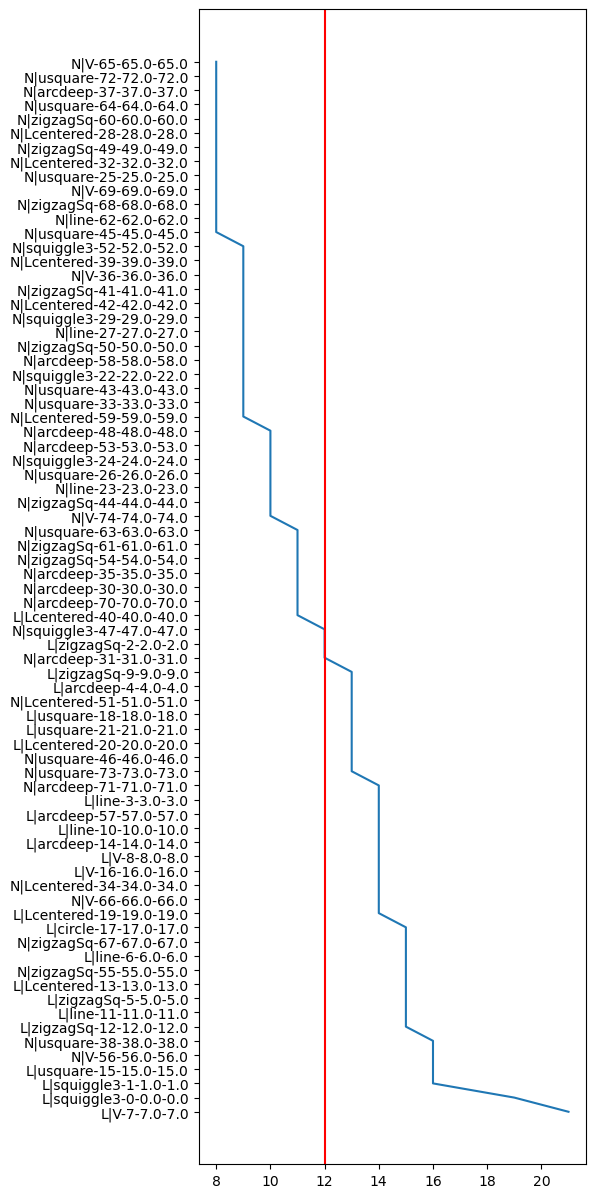

In [138]:
# Remove bad prims.
# currently can't do, since names change on each loading.
# see this (clean_shapes_strokes_aligned_consistantly_novel_prims) in dataset_summarize

# As hacky way to remove bad prims, throw out cases with few N trials.
shapes = PA.Xlabels["trials"]["seqc_0_shape_pref"].value_counts().index
counts = PA.Xlabels["trials"]["seqc_0_shape_pref"].value_counts().values
n_min_trials = 12
shapes_keep = [sh for sh, ct in zip(shapes, counts) if ct>n_min_trials]


fig, ax = plt.subplots(figsize=(5, 15))
ax.plot(counts, shapes)
ax.axvline(n_min_trials, color="r")

PA = PA.slice_by_labels_filtdict({"seqc_0_shape_pref":shapes_keep})

Doing PCA


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


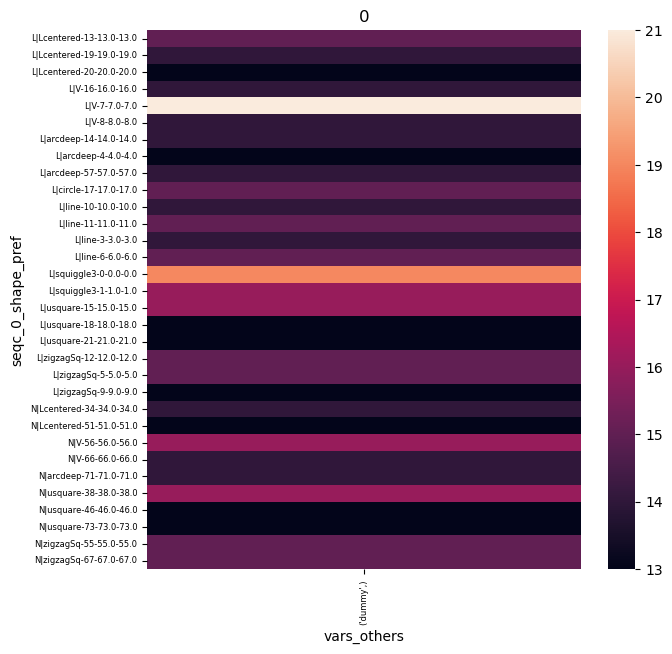

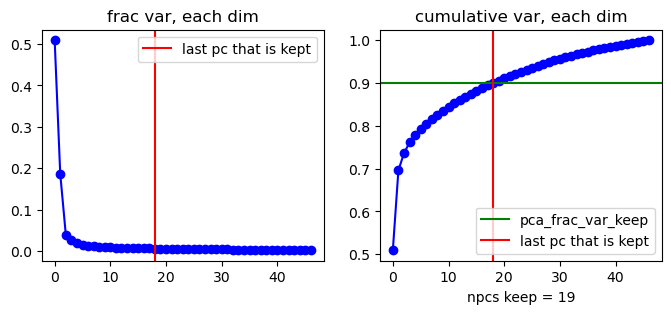

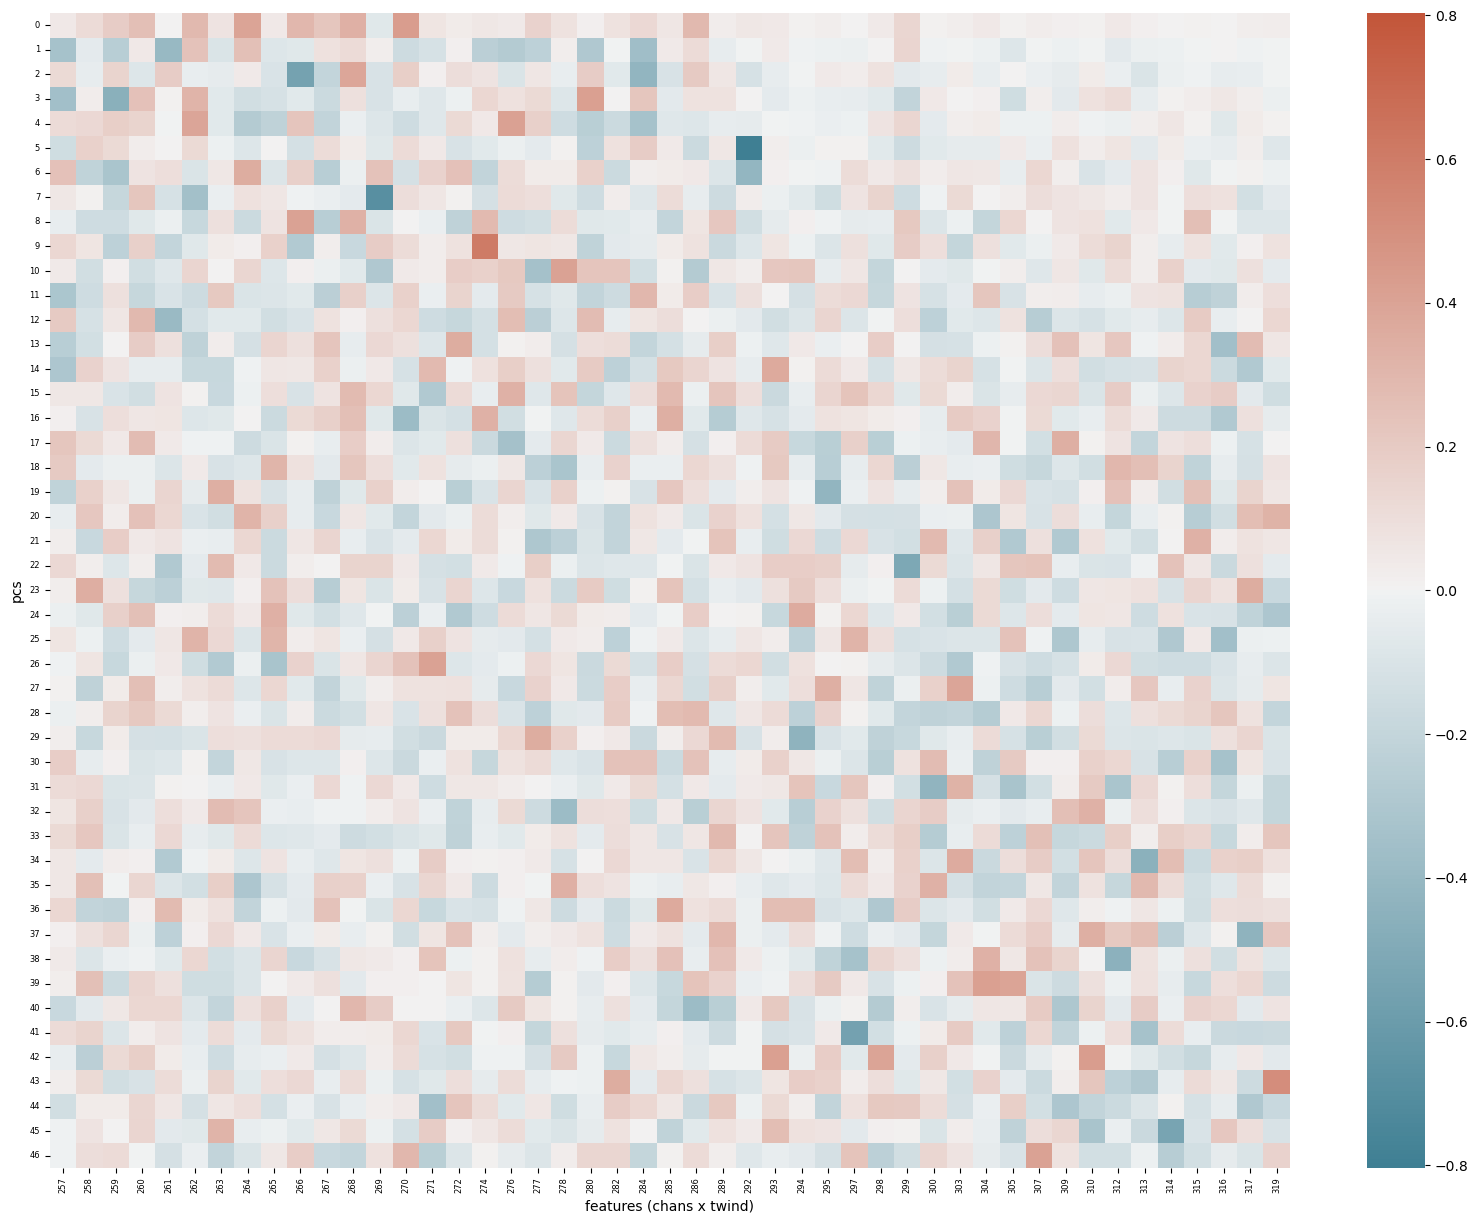

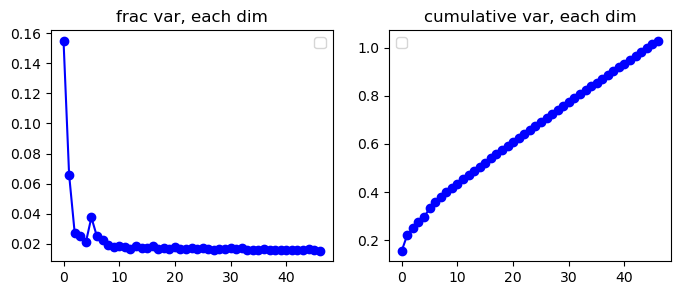

In [139]:


scalar_or_traj = "traj"
tbin_dur = 0.1
tbin_slide = 0.05

twind_data = (-0.1, 1.2)
restricted_twind_for_dpca = (0.05, 1.0)

raw_subtract_mean_each_timepoint = False
NPCS_KEEP = 7
dpca_var = "seqc_0_shape_pref"
dpca_vars_group = None
dpca_filtdict=None
dpca_proj_twind = None

dim_red_method = "dpca"

savedirpca = None

Xredu, PAredu = PA.dataextract_dimred_wrapper(scalar_or_traj, dim_red_method, savedirpca, 
        restricted_twind_for_dpca, tbin_dur, tbin_slide, NPCS_KEEP = NPCS_KEEP,
        dpca_var = dpca_var, dpca_vars_group = dpca_vars_group, dpca_proj_twind = twind_data, 
        raw_subtract_mean_each_timepoint=raw_subtract_mean_each_timepoint)


In [140]:
# Get pairwise dist between each shape at each timepoint
var_group = ["seqc_0_shape_pref", "shape_is_novel_all"]

# TODO: replace with dataextractwrap_distance_between_groups

# list_cldist, list_time = PAredu.dataextract_as_distance_matrix_clusters_flex(var_group,
#                                                      version_distance="euclidian",
#                                                      agg_before_distance=False, 
#                                                      return_as_single_mean_over_time=False)
# ### For each time bin, for each trial, get its dist index relative to base1 and base2.
# list_dfproj_index = []
# list_dfdist = []
# for i, (cldist, time) in enumerate(zip(list_cldist, list_time)):
#     print(time)
    
#     # Score pairs of (group, group)
#     # Obsolete, because this is just above, followed by agging
#     dfdist = cldist.rsa_distmat_score_all_pairs_of_label_groups(get_only_one_direction=True)

#     dfdist["time_bin"] = time
#     dfdist["time_bin_idx"] = i

#     list_dfdist.append(dfdist)

# ### Clean up the results
# DFDIST = pd.concat(list_dfdist).reset_index(drop=True)


... computing distance matrices, using distnace: euclidian


In [142]:
from pythonlib.tools.pandastools import append_col_with_grp_index
DFDIST = append_col_with_grp_index(DFDIST, ["shape_is_novel_all_1", "shape_is_novel_all_2"], "shape_novel_12")
DFDIST = append_col_with_grp_index(DFDIST, ["seqc_0_shape_pref_1", "seqc_0_shape_pref_2"], "seqc_0_shape_12")


/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/lucas/miniconda3/envs/drag2_matlab/lib/

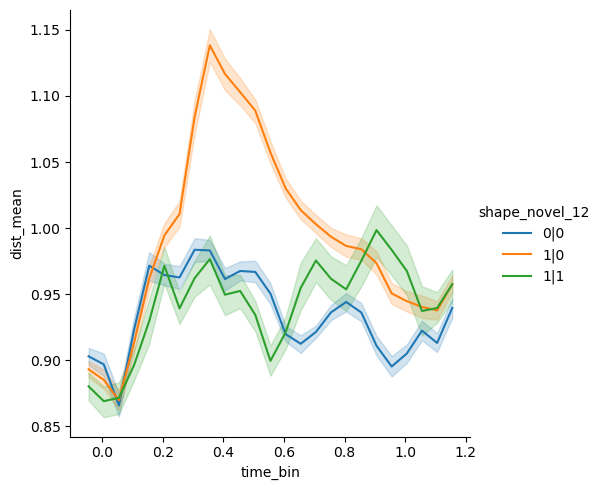

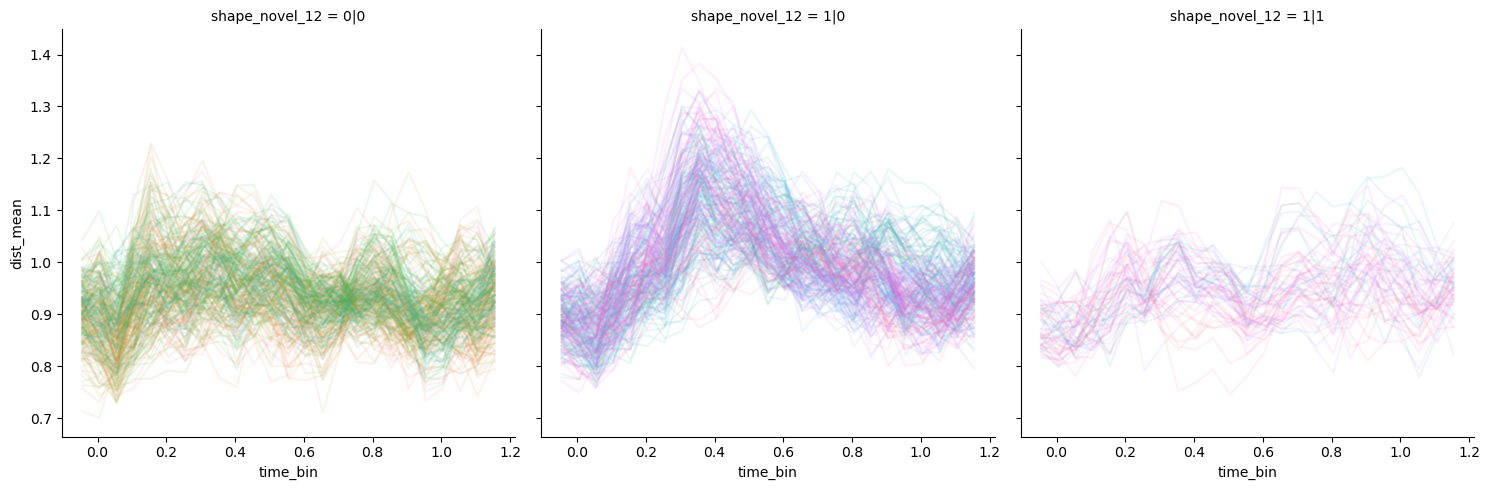

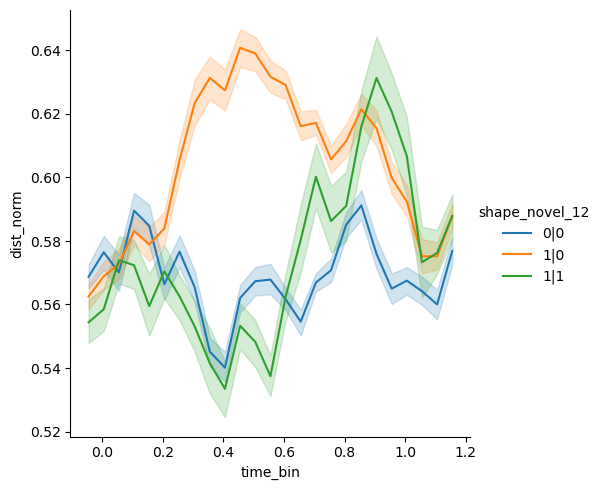

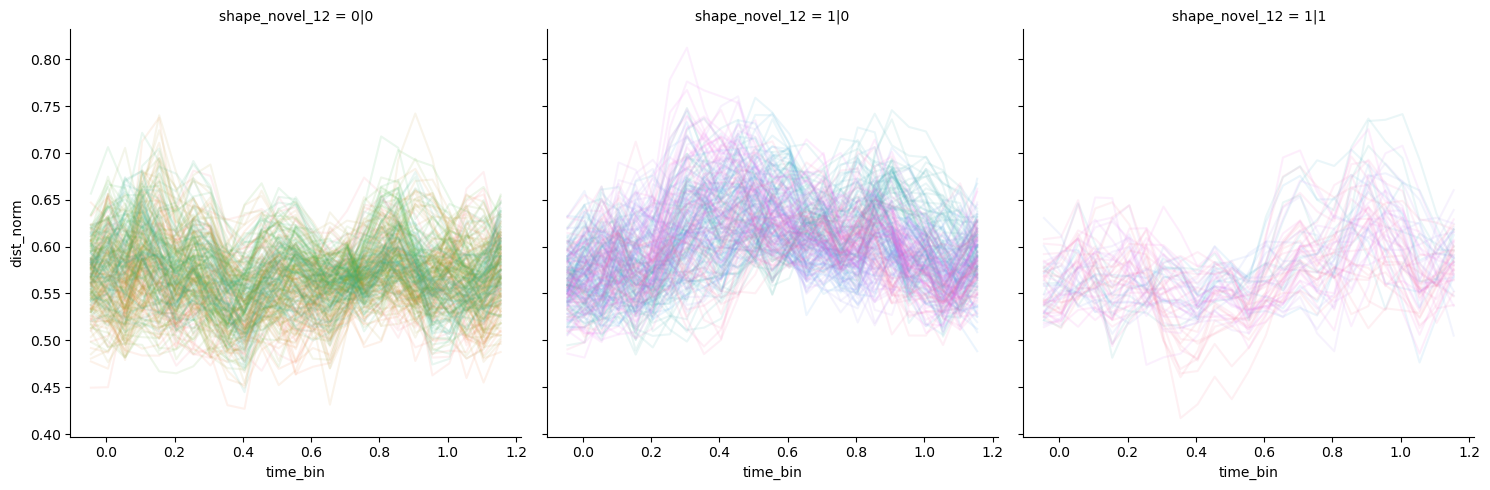

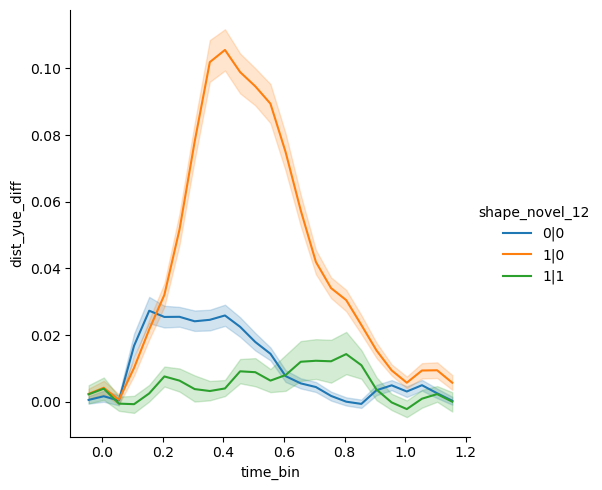

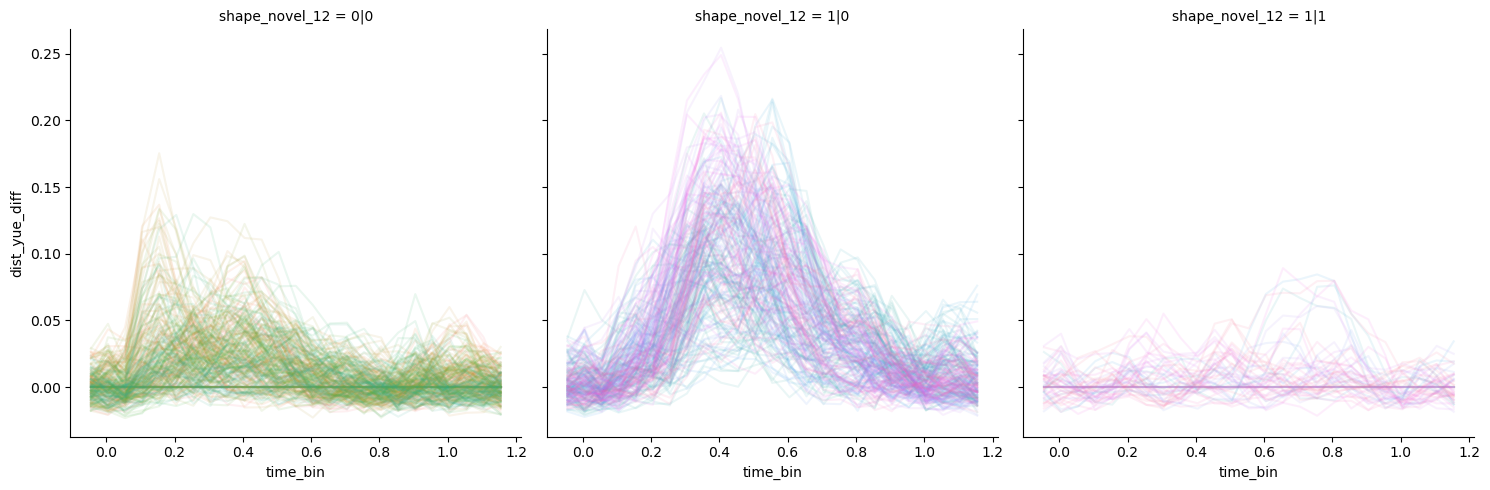

In [144]:
import seaborn as sns
for y in ["dist_mean", "dist_norm", "dist_yue_diff"]:
    fig = sns.relplot(data=DFDIST, x="time_bin", y=y, kind="line", hue="shape_novel_12")
    fig = sns.relplot(data=DFDIST, x="time_bin", y=y, kind="line", hue="seqc_0_shape_12", col="shape_novel_12", legend=False, alpha=0.1)


/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/lucas/miniconda3/envs/drag2_matlab/lib/

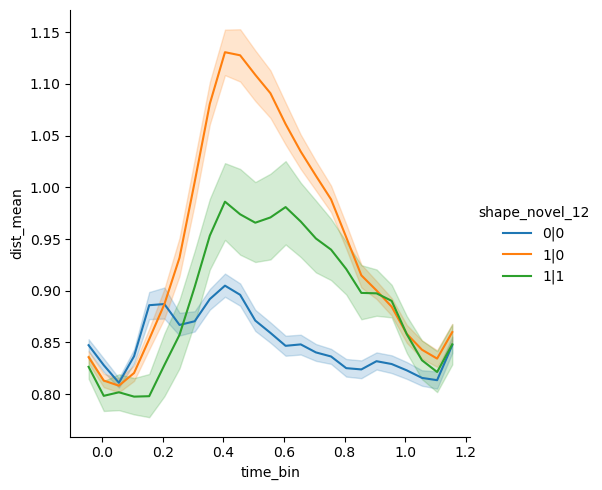

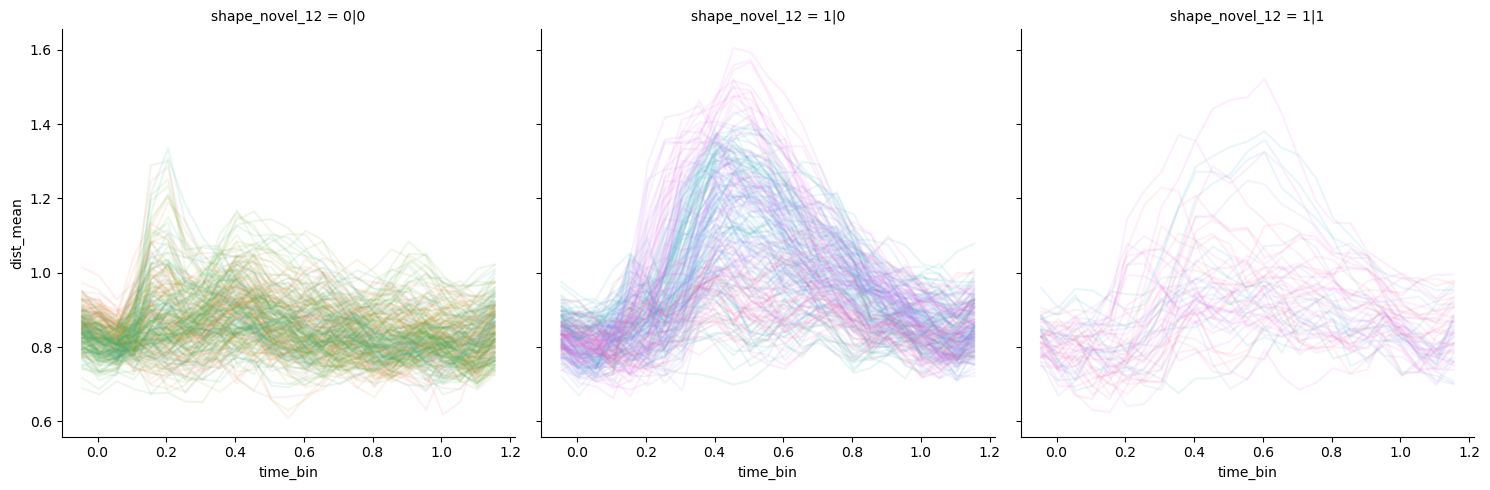

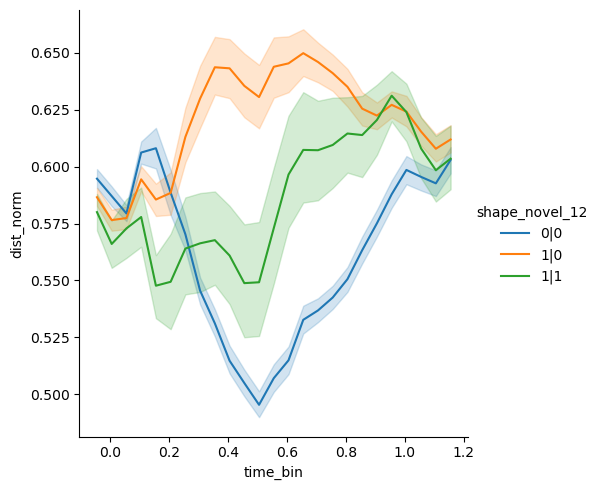

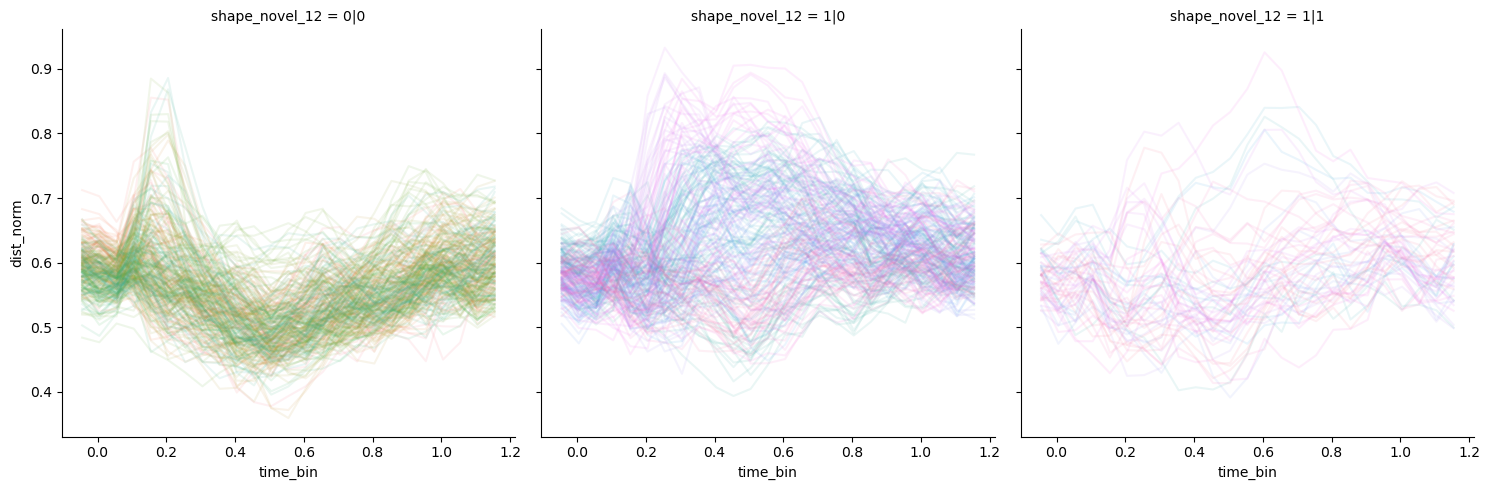

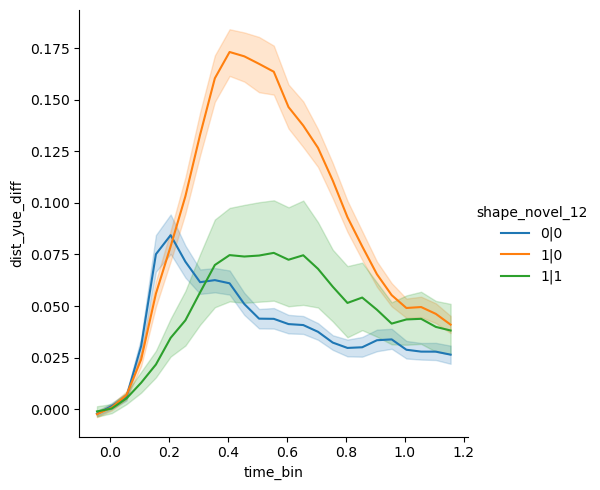

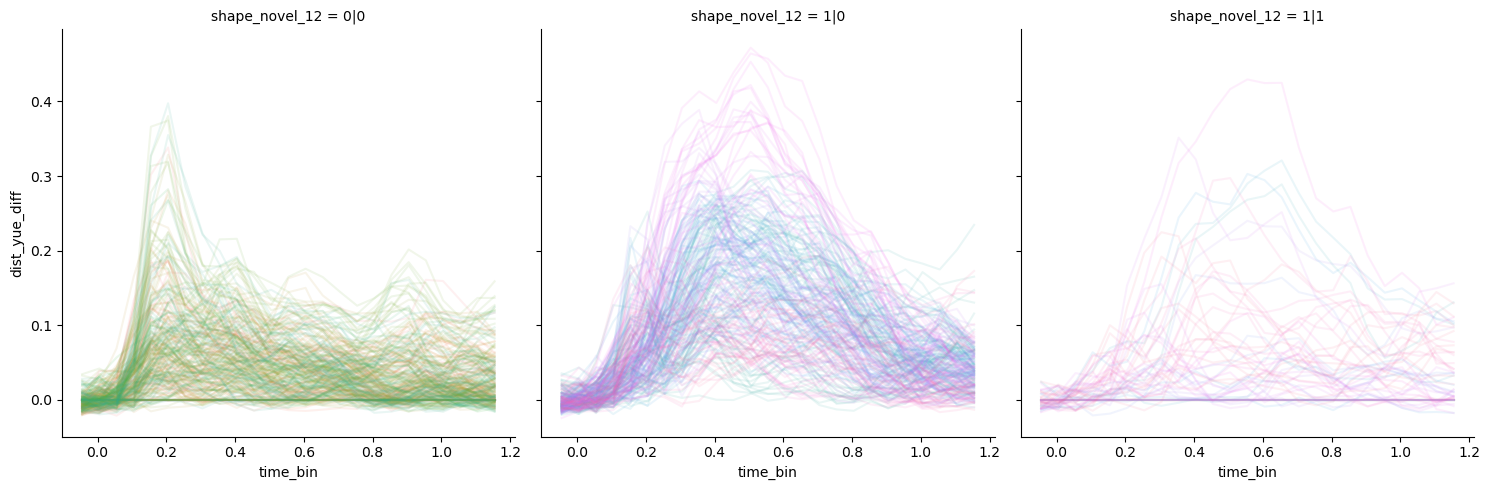

In [136]:
import seaborn as sns
for y in ["dist_mean", "dist_norm", "dist_yue_diff"]:
    fig = sns.relplot(data=DFDIST, x="time_bin", y=y, kind="line", hue="shape_novel_12")
    fig = sns.relplot(data=DFDIST, x="time_bin", y=y, kind="line", hue="seqc_0_shape_12", col="shape_novel_12", legend=False, alpha=0.1)


##### Keep only good strokes (based on motor)

In [49]:
sorted(DFDIST["seqc_0_shape_pref_1"].unique().tolist())

['L|Lcentered-13-13.0-13.0',
 'L|Lcentered-19-19.0-19.0',
 'L|Lcentered-20-20.0-20.0',
 'L|Lcentered-40-40.0-40.0',
 'L|V-16-16.0-16.0',
 'L|V-7-7.0-7.0',
 'L|V-8-8.0-8.0',
 'L|arcdeep-14-14.0-14.0',
 'L|arcdeep-4-4.0-4.0',
 'L|arcdeep-57-57.0-57.0',
 'L|circle-17-17.0-17.0',
 'L|line-10-10.0-10.0',
 'L|line-11-11.0-11.0',
 'L|line-3-3.0-3.0',
 'L|line-6-6.0-6.0',
 'L|squiggle3-0-0.0-0.0',
 'L|squiggle3-1-1.0-1.0',
 'L|usquare-15-15.0-15.0',
 'L|usquare-18-18.0-18.0',
 'L|usquare-21-21.0-21.0',
 'L|zigzagSq-12-12.0-12.0',
 'L|zigzagSq-2-2.0-2.0',
 'L|zigzagSq-5-5.0-5.0',
 'L|zigzagSq-9-9.0-9.0',
 'N|Lcentered-28-28.0-28.0',
 'N|Lcentered-32-32.0-32.0',
 'N|Lcentered-34-34.0-34.0',
 'N|Lcentered-39-39.0-39.0',
 'N|Lcentered-42-42.0-42.0',
 'N|Lcentered-51-51.0-51.0',
 'N|Lcentered-59-59.0-59.0',
 'N|V-36-36.0-36.0',
 'N|V-56-56.0-56.0',
 'N|V-65-65.0-65.0',
 'N|V-66-66.0-66.0',
 'N|V-69-69.0-69.0',
 'N|V-74-74.0-74.0',
 'N|arcdeep-30-30.0-30.0',
 'N|arcdeep-31-31.0-31.0',
 'N|arcdeep-35